<a href="https://colab.research.google.com/github/Jun-Liu-291/cats-and-dogs-CNN/blob/master/cat%26dog_v8_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Load a pretrained 5-layers-CNN model on cats & dogs small data set with 87% accuracy on validation set an 86% accuracy on test set

In [ ]:
from keras.models import load_model

model_base = load_model('/content/drive/My Drive/dataset/cats&dogs/small_dataset/cats_and_dogs_small_f3.h5')

Using TensorFlow backend.


In [ ]:
model_base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 256)      

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

conv_base = model_base.get_layer("dropout_2").output

conv_2d = layers.Conv2D(1024, (3, 3), activation='relu', padding = 'same', name = 'conv2d_5')(conv_base)
conv_2d = layers.Conv2D(1024, (3, 3), activation='relu', padding = 'same', name = 'conv2d_6')(conv_2d)
MPooling = layers.MaxPooling2D((2, 2), name = 'max_pooling2d_5')(conv_2d)
flatten = layers.Flatten()(MPooling)
dropout = layers.Dropout(0.4, name = 'dropout_3')(flatten)
dense = layers.Dense(1024, activation = 'relu')(dropout)
dense = layers.Dense(1024, activation = 'relu')(dense)
pred = layers.Dense(1, activation = 'sigmoid')(dense)

model = models.Model(inputs=model_base.input, outputs=pred)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 256)       2951

In [ ]:
from keras import optimizers

import tensorflow as tf


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

batch_size = 256
epoch_lenth = 100
image_size = (150, 150)
train_step_per_epochs = int(20000 / batch_size)
validation_step_per_epochs = int(2500 / batch_size)

train_dir = '/content/drive/My Drive/dataset/cat & dog/train'
validation_dir = '/content/drive/My Drive/dataset/cat & dog/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=35,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
# change callback function
# apply ReduceLRonPlateau for changing LR
reduceLR = ReduceLROnPlateau(
    monitor="loss",
    factor = 0.8,
    patience = 5,
    verbose = 1,
    mode = 'min',
    min_lr = 1e-5)

# save whole model when get a better val accuracy
checkpoint = ModelCheckpoint(
    filepath = '/content/drive/My Drive/dataset/cat & dog/cat&dog_model.{epoch:02d}-{val_loss:.2f}.h5',
    monitor='val_acc',
    save_weights_only = False,
    save_best_only = True
)

my_callbacks = [reduceLR, checkpoint]

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_step_per_epochs,
    epochs=epoch_lenth,
    validation_data=validation_generator,
    validation_steps=validation_step_per_epochs,
    callbacks = my_callbacks
)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 67 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/78 [..............................] - ETA: 1:53:19 - loss: 0.7879 - acc: 0.4844

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/78 [..............................] - ETA: 1:38:48 - loss: 1613.7382 - acc: 0.4707

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 32 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/78 [>.............................] - ETA: 1:35:00 - loss: 1076.0553 - acc: 0.4857

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 77 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/78 [>.............................] - ETA: 1:32:59 - loss: 807.2199 - acc: 0.4844 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/78 [>.............................] - ETA: 1:31:34 - loss: 645.9707 - acc: 0.4930

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 39 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/78 [=>............................] - ETA: 1:30:51 - loss: 538.4242 - acc: 0.4980

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 69 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/78 [=>............................] - ETA: 1:29:31 - loss: 461.6051 - acc: 0.5000

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/78 [==>...........................] - ETA: 1:27:40 - loss: 403.9917 - acc: 0.5010

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 31 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/78 [==>...........................] - ETA: 1:26:57 - loss: 359.1805 - acc: 0.5000

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 51 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/78 [==>...........................] - ETA: 1:26:03 - loss: 323.3313 - acc: 0.5035

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 50 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/78 [===>..........................] - ETA: 1:25:38 - loss: 294.0005 - acc: 0.5025

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/78 [===>..........................] - ETA: 1:24:10 - loss: 269.5596 - acc: 0.5023

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/78 [====>.........................] - ETA: 1:22:48 - loss: 248.8775 - acc: 0.5018

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 34 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/78 [====>.........................] - ETA: 1:21:40 - loss: 231.1497 - acc: 0.5036

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/78 [====>.........................] - ETA: 1:20:24 - loss: 215.7855 - acc: 0.5052

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 46 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/78 [=====>........................] - ETA: 1:18:55 - loss: 202.3421 - acc: 0.5027

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 59 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/78 [=====>........................] - ETA: 1:17:34 - loss: 190.4800 - acc: 0.5053

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 56 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/78 [=====>........................] - ETA: 1:16:43 - loss: 179.9358 - acc: 0.5089

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 55 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/78 [======>.......................] - ETA: 1:15:34 - loss: 170.5016 - acc: 0.5107

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 45 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/78 [======>.......................] - ETA: 1:14:21 - loss: 162.0119 - acc: 0.5086

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 44 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/78 [=======>......................] - ETA: 1:13:15 - loss: 154.3301 - acc: 0.5073

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 70 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/78 [=======>......................] - ETA: 1:12:09 - loss: 147.3462 - acc: 0.5076

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 65 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/78 [=======>......................] - ETA: 1:10:39 - loss: 140.9689 - acc: 0.5134

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 33 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/78 [========>.....................] - ETA: 1:09:31 - loss: 135.1229 - acc: 0.5173

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 53 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/78 [========>.....................] - ETA: 1:08:08 - loss: 129.7437 - acc: 0.5213

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 54 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/78 [=========>....................] - ETA: 1:06:53 - loss: 124.7954 - acc: 0.5204

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/78 [=========>....................] - ETA: 1:05:48 - loss: 120.2006 - acc: 0.5201

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/78 [=========>....................] - ETA: 1:04:26 - loss: 115.9322 - acc: 0.5216

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/78 [==========>...................] - ETA: 1:03:02 - loss: 111.9582 - acc: 0.5228

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


30/78 [==========>...................] - ETA: 1:01:39 - loss: 108.2487 - acc: 0.5253

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


31/78 [==========>...................] - ETA: 1:00:16 - loss: 104.7782 - acc: 0.5282

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 49 could not be retrieved. It could be because a worker has died.
  UserWarning)


32/78 [===========>..................] - ETA: 59:03 - loss: 101.5246 - acc: 0.5325  

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 41 could not be retrieved. It could be because a worker has died.
  UserWarning)


33/78 [===========>..................] - ETA: 57:44 - loss: 98.4680 - acc: 0.5350 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 71 could not be retrieved. It could be because a worker has died.
  UserWarning)


34/78 [============>.................] - ETA: 56:25 - loss: 95.5908 - acc: 0.5379

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


35/78 [============>.................] - ETA: 55:11 - loss: 92.8770 - acc: 0.5422

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 35 could not be retrieved. It could be because a worker has died.
  UserWarning)


36/78 [============>.................] - ETA: 53:51 - loss: 90.3151 - acc: 0.5449

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 43 could not be retrieved. It could be because a worker has died.
  UserWarning)


37/78 [=============>................] - ETA: 52:33 - loss: 87.8931 - acc: 0.5440

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 72 could not be retrieved. It could be because a worker has died.
  UserWarning)


38/78 [=============>................] - ETA: 51:34 - loss: 85.5994 - acc: 0.5437

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


39/78 [==============>...............] - ETA: 50:16 - loss: 83.4219 - acc: 0.5432

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 75 could not be retrieved. It could be because a worker has died.
  UserWarning)


40/78 [==============>...............] - ETA: 49:08 - loss: 81.3527 - acc: 0.5442

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


41/78 [==============>...............] - ETA: 47:54 - loss: 79.3847 - acc: 0.5464

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 61 could not be retrieved. It could be because a worker has died.
  UserWarning)


42/78 [===============>..............] - ETA: 46:30 - loss: 77.5096 - acc: 0.5494

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


43/78 [===============>..............] - ETA: 45:21 - loss: 75.7240 - acc: 0.5491

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


44/78 [===============>..............] - ETA: 44:00 - loss: 74.0183 - acc: 0.5502

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 76 could not be retrieved. It could be because a worker has died.
  UserWarning)


45/78 [================>.............] - ETA: 42:38 - loss: 72.3880 - acc: 0.5516

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


46/78 [================>.............] - ETA: 41:17 - loss: 70.8287 - acc: 0.5526

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 66 could not be retrieved. It could be because a worker has died.
  UserWarning)


47/78 [=================>............] - ETA: 40:01 - loss: 69.3353 - acc: 0.5546

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


48/78 [=================>............] - ETA: 38:42 - loss: 67.9034 - acc: 0.5585

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 64 could not be retrieved. It could be because a worker has died.
  UserWarning)


49/78 [=================>............] - ETA: 37:28 - loss: 66.5318 - acc: 0.5604

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


50/78 [==================>...........] - ETA: 36:16 - loss: 65.2165 - acc: 0.5591

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


51/78 [==================>...........] - ETA: 35:05 - loss: 63.9511 - acc: 0.5582

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 63 could not be retrieved. It could be because a worker has died.
  UserWarning)


52/78 [===================>..........] - ETA: 33:46 - loss: 62.7341 - acc: 0.5596

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


53/78 [===================>..........] - ETA: 32:28 - loss: 61.5625 - acc: 0.5609

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 74 could not be retrieved. It could be because a worker has died.
  UserWarning)


54/78 [===================>..........] - ETA: 31:13 - loss: 60.4339 - acc: 0.5632

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 68 could not be retrieved. It could be because a worker has died.
  UserWarning)


55/78 [====================>.........] - ETA: 29:59 - loss: 59.3461 - acc: 0.5653

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


56/78 [====================>.........] - ETA: 28:43 - loss: 58.2986 - acc: 0.5654

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 42 could not be retrieved. It could be because a worker has died.
  UserWarning)


57/78 [====================>.........] - ETA: 27:24 - loss: 57.2931 - acc: 0.5650

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


58/78 [=====================>........] - ETA: 26:16 - loss: 56.3167 - acc: 0.5643

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


59/78 [=====================>........] - ETA: 24:57 - loss: 55.3735 - acc: 0.5638

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


60/78 [======================>.......] - ETA: 23:37 - loss: 54.4617 - acc: 0.5630

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 73 could not be retrieved. It could be because a worker has died.
  UserWarning)


61/78 [======================>.......] - ETA: 22:21 - loss: 53.5797 - acc: 0.5637

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


62/78 [======================>.......] - ETA: 21:02 - loss: 52.7260 - acc: 0.5641

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 40 could not be retrieved. It could be because a worker has died.
  UserWarning)


63/78 [=======================>......] - ETA: 19:44 - loss: 51.8998 - acc: 0.5643

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


64/78 [=======================>......] - ETA: 18:26 - loss: 51.1026 - acc: 0.5628

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


65/78 [========================>.....] - ETA: 17:06 - loss: 50.3269 - acc: 0.5637

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


66/78 [========================>.....] - ETA: 15:47 - loss: 49.5743 - acc: 0.5651

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 57 could not be retrieved. It could be because a worker has died.
  UserWarning)


67/78 [========================>.....] - ETA: 14:28 - loss: 48.8438 - acc: 0.5675

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 48 could not be retrieved. It could be because a worker has died.
  UserWarning)


68/78 [=========================>....] - ETA: 13:10 - loss: 48.1353 - acc: 0.5680

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 58 could not be retrieved. It could be because a worker has died.
  UserWarning)


69/78 [=========================>....] - ETA: 11:55 - loss: 47.4475 - acc: 0.5680

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


70/78 [=========================>....] - ETA: 10:38 - loss: 46.7788 - acc: 0.5685

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 52 could not be retrieved. It could be because a worker has died.
  UserWarning)


71/78 [==========================>...] - ETA: 9:18 - loss: 46.1287 - acc: 0.5700 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 60 could not be retrieved. It could be because a worker has died.
  UserWarning)


72/78 [==========================>...] - ETA: 7:58 - loss: 45.4958 - acc: 0.5722

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


73/78 [===========================>..] - ETA: 6:38 - loss: 44.8813 - acc: 0.5732

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 38 could not be retrieved. It could be because a worker has died.
  UserWarning)


74/78 [===========================>..] - ETA: 5:18 - loss: 44.2833 - acc: 0.5737

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 37 could not be retrieved. It could be because a worker has died.
  UserWarning)


75/78 [===========================>..] - ETA: 3:59 - loss: 43.7018 - acc: 0.5731

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 36 could not be retrieved. It could be because a worker has died.
  UserWarning)


76/78 [============================>.] - ETA: 2:39 - loss: 43.1353 - acc: 0.5737

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 62 could not be retrieved. It could be because a worker has died.
  UserWarning)


78/78 [==============================] - 6142s 79s/step - loss: 42.0498 - acc: 0.5761 - val_loss: 0.6467 - val_acc: 0.5994
Epoch 2/50


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 47 could not be retrieved. It could be because a worker has died.
  UserWarning)


78/78 [==============================] - 248s 3s/step - loss: 0.7188 - acc: 0.5841 - val_loss: 0.6622 - val_acc: 0.5681
Epoch 3/50
78/78 [==============================] - 175s 2s/step - loss: 0.8522 - acc: 0.5719 - val_loss: 0.6987 - val_acc: 0.5703
Epoch 4/50
78/78 [==============================] - 174s 2s/step - loss: 0.6936 - acc: 0.5876 - val_loss: 0.8268 - val_acc: 0.5085
Epoch 5/50
78/78 [==============================] - 175s 2s/step - loss: 0.6875 - acc: 0.6190 - val_loss: 0.5540 - val_acc: 0.7676
Epoch 6/50
78/78 [==============================] - 174s 2s/step - loss: 0.6167 - acc: 0.7041 - val_loss: 0.5255 - val_acc: 0.8010
Epoch 7/50
78/78 [==============================] - 177s 2s/step - loss: 0.4966 - acc: 0.7677 - val_loss: 0.5309 - val_acc: 0.7516
Epoch 8/50
78/78 [==============================] - 174s 2s/step - loss: 0.4663 - acc: 0.7844 - val_loss: 0.3746 - val_acc: 0.8219
Epoch 9/50
78/78 [==============================] - 175s 2s/step - loss: 0.4301 - acc: 0.8053 

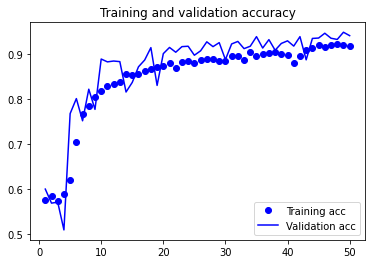

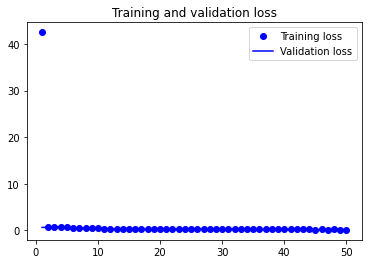

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

model = models.load_model('/content/drive/My Drive/dataset/cat & dog/cats_and_dogs_f1.h5')

Using TensorFlow backend.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_step_per_epochs,
    epochs=epoch_lenth,
    validation_data=validation_generator,
    validation_steps=validation_step_per_epochs,
    callbacks = my_callbacks
)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 46 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/78 [..............................] - ETA: 3:38:00 - loss: 0.2374 - acc: 0.9219

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/78 [..............................] - ETA: 3:06:09 - loss: 0.1981 - acc: 0.9258

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 45 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/78 [>.............................] - ETA: 3:02:02 - loss: 0.1688 - acc: 0.9388

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/78 [>.............................] - ETA: 3:02:12 - loss: 0.1630 - acc: 0.9414

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 68 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/78 [>.............................] - ETA: 3:00:10 - loss: 0.1659 - acc: 0.9344

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 60 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/78 [=>............................] - ETA: 2:58:31 - loss: 0.1685 - acc: 0.9316

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/78 [=>............................] - ETA: 2:54:41 - loss: 0.1663 - acc: 0.9330

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 44 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/78 [==>...........................] - ETA: 2:53:21 - loss: 0.1622 - acc: 0.9346

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 41 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/78 [==>...........................] - ETA: 2:49:52 - loss: 0.1586 - acc: 0.9362

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/78 [==>...........................] - ETA: 2:46:00 - loss: 0.1743 - acc: 0.9355

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 32 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/78 [===>..........................] - ETA: 2:42:32 - loss: 0.1708 - acc: 0.9364

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 38 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/78 [===>..........................] - ETA: 2:41:06 - loss: 0.1676 - acc: 0.9372

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 76 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/78 [====>.........................] - ETA: 2:38:09 - loss: 0.1656 - acc: 0.9369

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/78 [====>.........................] - ETA: 2:36:45 - loss: 0.1652 - acc: 0.9358

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 59 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/78 [====>.........................] - ETA: 2:34:03 - loss: 0.1668 - acc: 0.9346

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 50 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/78 [=====>........................] - ETA: 2:31:32 - loss: 0.1646 - acc: 0.9346

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 56 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/78 [=====>........................] - ETA: 2:28:39 - loss: 0.1623 - acc: 0.9343

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/78 [=====>........................] - ETA: 2:25:47 - loss: 0.1614 - acc: 0.9353

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 70 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/78 [======>.......................] - ETA: 2:23:05 - loss: 0.1605 - acc: 0.9359

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 71 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/78 [======>.......................] - ETA: 2:20:15 - loss: 0.1595 - acc: 0.9361

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/78 [=======>......................] - ETA: 2:17:37 - loss: 0.1598 - acc: 0.9364

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 47 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/78 [=======>......................] - ETA: 2:14:55 - loss: 0.1599 - acc: 0.9361

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/78 [=======>......................] - ETA: 2:12:14 - loss: 0.1576 - acc: 0.9370

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/78 [========>.....................] - ETA: 2:10:03 - loss: 0.1573 - acc: 0.9362

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 57 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/78 [========>.....................] - ETA: 2:08:08 - loss: 0.1548 - acc: 0.9372

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 54 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/78 [=========>....................] - ETA: 2:05:34 - loss: 0.1534 - acc: 0.9378

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/78 [=========>....................] - ETA: 2:03:22 - loss: 0.1513 - acc: 0.9385

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 58 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/78 [=========>....................] - ETA: 2:01:04 - loss: 0.1524 - acc: 0.9382

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/78 [==========>...................] - ETA: 1:58:52 - loss: 0.1518 - acc: 0.9388

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


30/78 [==========>...................] - ETA: 1:56:23 - loss: 0.1515 - acc: 0.9387

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


31/78 [==========>...................] - ETA: 1:53:48 - loss: 0.1507 - acc: 0.9391

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 73 could not be retrieved. It could be because a worker has died.
  UserWarning)


32/78 [===========>..................] - ETA: 1:51:14 - loss: 0.1512 - acc: 0.9384

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 35 could not be retrieved. It could be because a worker has died.
  UserWarning)


33/78 [===========>..................] - ETA: 1:48:44 - loss: 0.1501 - acc: 0.9386

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 36 could not be retrieved. It could be because a worker has died.
  UserWarning)


34/78 [============>.................] - ETA: 1:46:25 - loss: 0.1481 - acc: 0.9392

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 39 could not be retrieved. It could be because a worker has died.
  UserWarning)


35/78 [============>.................] - ETA: 1:44:04 - loss: 0.1468 - acc: 0.9396

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 61 could not be retrieved. It could be because a worker has died.
  UserWarning)


36/78 [============>.................] - ETA: 1:41:49 - loss: 0.1485 - acc: 0.9391

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 74 could not be retrieved. It could be because a worker has died.
  UserWarning)


37/78 [=============>................] - ETA: 1:39:25 - loss: 0.1474 - acc: 0.9395

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


38/78 [=============>................] - ETA: 1:36:53 - loss: 0.1469 - acc: 0.9397

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 52 could not be retrieved. It could be because a worker has died.
  UserWarning)


39/78 [==============>...............] - ETA: 1:34:21 - loss: 0.1463 - acc: 0.9402

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


40/78 [==============>...............] - ETA: 1:31:56 - loss: 0.1461 - acc: 0.9403

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 33 could not be retrieved. It could be because a worker has died.
  UserWarning)


41/78 [==============>...............] - ETA: 1:29:25 - loss: 0.1456 - acc: 0.9405

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


42/78 [===============>..............] - ETA: 1:26:59 - loss: 0.1453 - acc: 0.9411

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


43/78 [===============>..............] - ETA: 1:24:32 - loss: 0.1439 - acc: 0.9418

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 43 could not be retrieved. It could be because a worker has died.
  UserWarning)


44/78 [===============>..............] - ETA: 1:22:03 - loss: 0.1439 - acc: 0.9416

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 53 could not be retrieved. It could be because a worker has died.
  UserWarning)


45/78 [================>.............] - ETA: 1:19:37 - loss: 0.1442 - acc: 0.9414

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


47/78 [=================>............] - ETA: 1:13:19 - loss: 0.1454 - acc: 0.9404

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


48/78 [=================>............] - ETA: 1:10:58 - loss: 0.1474 - acc: 0.9397

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 67 could not be retrieved. It could be because a worker has died.
  UserWarning)


49/78 [=================>............] - ETA: 1:08:36 - loss: 0.1471 - acc: 0.9394

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 64 could not be retrieved. It could be because a worker has died.
  UserWarning)


50/78 [==================>...........] - ETA: 1:06:13 - loss: 0.1464 - acc: 0.9398

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 37 could not be retrieved. It could be because a worker has died.
  UserWarning)


51/78 [==================>...........] - ETA: 1:03:51 - loss: 0.1458 - acc: 0.9400

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 42 could not be retrieved. It could be because a worker has died.
  UserWarning)


52/78 [===================>..........] - ETA: 1:01:26 - loss: 0.1457 - acc: 0.9401

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


53/78 [===================>..........] - ETA: 59:07 - loss: 0.1453 - acc: 0.9403  

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


54/78 [===================>..........] - ETA: 56:46 - loss: 0.1456 - acc: 0.9404

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


55/78 [====================>.........] - ETA: 54:24 - loss: 0.1452 - acc: 0.9408

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 63 could not be retrieved. It could be because a worker has died.
  UserWarning)


56/78 [====================>.........] - ETA: 52:02 - loss: 0.1453 - acc: 0.9406

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 69 could not be retrieved. It could be because a worker has died.
  UserWarning)


57/78 [====================>.........] - ETA: 49:39 - loss: 0.1453 - acc: 0.9405

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 66 could not be retrieved. It could be because a worker has died.
  UserWarning)


58/78 [=====================>........] - ETA: 47:15 - loss: 0.1461 - acc: 0.9404

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


59/78 [=====================>........] - ETA: 44:52 - loss: 0.1463 - acc: 0.9404

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 51 could not be retrieved. It could be because a worker has died.
  UserWarning)


60/78 [======================>.......] - ETA: 42:31 - loss: 0.1457 - acc: 0.9406

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


61/78 [======================>.......] - ETA: 40:10 - loss: 0.1453 - acc: 0.9407

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


62/78 [======================>.......] - ETA: 37:48 - loss: 0.1460 - acc: 0.9406

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


63/78 [=======================>......] - ETA: 35:28 - loss: 0.1456 - acc: 0.9406

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 65 could not be retrieved. It could be because a worker has died.
  UserWarning)


64/78 [=======================>......] - ETA: 33:05 - loss: 0.1458 - acc: 0.9407

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 77 could not be retrieved. It could be because a worker has died.
  UserWarning)


65/78 [========================>.....] - ETA: 30:43 - loss: 0.1470 - acc: 0.9406

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 40 could not be retrieved. It could be because a worker has died.
  UserWarning)


66/78 [========================>.....] - ETA: 28:20 - loss: 0.1467 - acc: 0.9407

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 72 could not be retrieved. It could be because a worker has died.
  UserWarning)


67/78 [========================>.....] - ETA: 26:00 - loss: 0.1463 - acc: 0.9409

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 62 could not be retrieved. It could be because a worker has died.
  UserWarning)


68/78 [=========================>....] - ETA: 23:39 - loss: 0.1467 - acc: 0.9406

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 48 could not be retrieved. It could be because a worker has died.
  UserWarning)


69/78 [=========================>....] - ETA: 21:16 - loss: 0.1468 - acc: 0.9407

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


70/78 [=========================>....] - ETA: 18:54 - loss: 0.1473 - acc: 0.9404

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


71/78 [==========================>...] - ETA: 16:33 - loss: 0.1474 - acc: 0.9406

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 55 could not be retrieved. It could be because a worker has died.
  UserWarning)


72/78 [==========================>...] - ETA: 14:11 - loss: 0.1470 - acc: 0.9409

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


73/78 [===========================>..] - ETA: 11:49 - loss: 0.1464 - acc: 0.9411

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


74/78 [===========================>..] - ETA: 9:27 - loss: 0.1463 - acc: 0.9411 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


75/78 [===========================>..] - ETA: 7:05 - loss: 0.1462 - acc: 0.9412

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 49 could not be retrieved. It could be because a worker has died.
  UserWarning)


76/78 [============================>.] - ETA: 4:44 - loss: 0.1453 - acc: 0.9415

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 31 could not be retrieved. It could be because a worker has died.
  UserWarning)


77/78 [============================>.] - ETA: 2:22 - loss: 0.1454 - acc: 0.9417

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 75 could not be retrieved. It could be because a worker has died.
  UserWarning)


78/78 [==============================] - 11084s 142s/step - loss: 0.1453 - acc: 0.9416 - val_loss: 0.1248 - val_acc: 0.9466
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 34 could not be retrieved. It could be because a worker has died.
  UserWarning)


78/78 [==============================] - 374s 5s/step - loss: 0.1275 - acc: 0.9482 - val_loss: 0.1271 - val_acc: 0.9506
Epoch 3/100
78/78 [==============================] - 244s 3s/step - loss: 0.1240 - acc: 0.9503 - val_loss: 0.2765 - val_acc: 0.9555
Epoch 4/100
78/78 [==============================] - 243s 3s/step - loss: 0.1322 - acc: 0.9467 - val_loss: 0.1259 - val_acc: 0.9475
Epoch 5/100
78/78 [==============================] - 241s 3s/step - loss: 0.1231 - acc: 0.9505 - val_loss: 0.1814 - val_acc: 0.9510
Epoch 6/100
78/78 [==============================] - 237s 3s/step - loss: 0.1225 - acc: 0.9505 - val_loss: 0.1783 - val_acc: 0.9479
Epoch 7/100
78/78 [==============================] - 236s 3s/step - loss: 0.1253 - acc: 0.9516 - val_loss: 0.2448 - val_acc: 0.9492
Epoch 8/100
78/78 [==============================] - 238s 3s/step - loss: 0.1253 - acc: 0.9513 - val_loss: 0.1137 - val_acc: 0.9537
Epoch 9/100
78/78 [==============================] - 240s 3s/step - loss: 0.1214 - acc: 

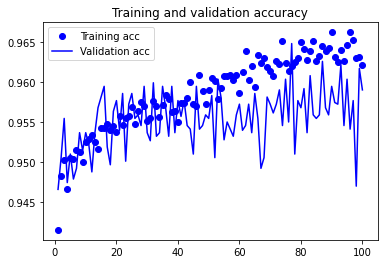

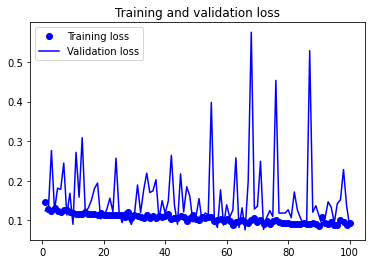

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/My Drive/dataset/cat & dog/cats_and_dogs_f1.h5')

In [ ]:
test1_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/My Drive/dataset/cat & dog/test'

test1_generator = test1_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

model.evaluate_generator(test1_generator)

Found 2500 images belonging to 2 classes.


[0.005508075468242168, 0.9595999717712402]

Summary:
1. finally got a model with 95.9% accuracy on validation set and 95.9% accuracy on test set
2. There is no overfitting problem. Even there is a small gap between training accuracy and validation accuracy, but this is variance error. I consider it as overfitting in the previous code by mistake.
3. The bias error is large, since the training accuracy is close to 97%, but the Bayes error should be close to 100%. The variance error is acceptable for my first project.